In [2]:
# BIOTIE
# it can:
# - search and fetch data from biological file formats
# - reading and writing popular sequences/structure file formats
# - analyzing and editing sequence/structure data
# - visualizing sequence/structure data
# - interfacting external applications for further analysis

In [3]:
# modules of biotite
# - sequence: functionality for working with seq info of any kind
# - structure: enables handling of 3D structures of biomolecules
# - applications: provides interfaces for external software, in case Biotite's integrated finctionality is not sufficient for your taks
# - database: searching and downloading data from biological database, including the arguably most important ones: RCSB, PDB, NCBI entrez database

In [ ]:
# 1. Handling/Handling with sequences using the sequence subpackage
### Sequence analysis
# + DNA and RNA sequence
# - A adenine
# - C cytosine
# - G
# - T
# - U (RNA)

In [7]:
# Load our pkgs
import biotite

In [8]:
# Methods
dir(biotite)

['AdaptiveFancyArrow',
 'Copyable',
 'File',
 'InvalidFileError',
 'TextFile',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'colors',
 'copyable',
 'file',
 'sequence',
 'set_font_size_in_coord',
 'temp',
 'temp_dir',
 'temp_file',
 'visualize']

In [9]:
import biotite.sequence as seq

In [10]:
dir(seq)

['Alphabet',
 'AlphabetError',
 'AlphabetMapper',
 'AnnotatedSequence',
 'Annotation',
 'CodonTable',
 'Feature',
 'GeneralSequence',
 'LetterAlphabet',
 'Location',
 'NucleotideSequence',
 'ProteinSequence',
 'Sequence',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alphabet',
 'annotation',
 'codec',
 'codon',
 'find_subsequence',
 'find_symbol',
 'find_symbol_first',
 'find_symbol_last',
 'search',
 'seqtypes',
 'sequence']

In [32]:
# creating simple DNA seq
dna = seq.NucleotideSequence('ATCGAGGAT')

In [33]:
dna

In [34]:
# display
print(dna)
str(dna)

ATCGAGGAT


'ATCGAGGAT'

In [35]:
# Simple seq analysis
# Check for Alphabet in the nucleotide
print(dna.get_alphabet())
print(dna.alphabet)

['A', 'C', 'G', 'T']
['A', 'C', 'G', 'T']


In [36]:
# Counts/Frequency of nucleotide in DNA
print(dna.get_symbol_frequency())

{'A': 3, 'C': 1, 'G': 3, 'T': 2}


In [37]:
# View
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

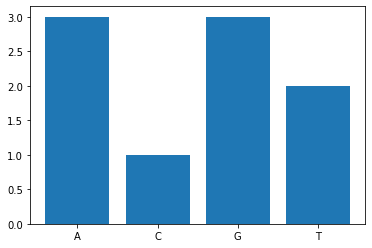

In [38]:
dna_freq = dna.get_symbol_frequency()
plt.bar(dna_freq.keys(),dna_freq.values())

In [39]:
# Check for complement
dir(dna)

['__abstractmethods__',
 '__add__',
 '__class__',
 '__copy_create__',
 '__copy_fill__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_alphabet',
 '_compl_dict',
 '_complement_func',
 '_dtype',
 '_key',
 '_key_code',
 '_seq_code',
 '_val_code',
 '_value',
 'alphabet',
 'alphabet_amb',
 'alphabet_unamb',
 'ambiguous_alphabet',
 'code',
 'compl_symbol_dict',
 'complement',
 'copy',
 'get_alphabet',
 'get_symbol_frequency',
 'is_valid',
 'reverse',
 'symbols',
 'translate',
 'unambiguous_alphabet']

In [40]:
dna.complement
print(dna.complement())

TAGCTCCTA


In [43]:
# Protein synthesis (transcription (not with biotite), translation)
# ALWAYS MUST BE A COMPLETE TRANSLATION
protein = dna.translate(complete=True)

In [44]:
print(protein)

IED


In [47]:
# Reverse complement
print(dna.reverse().complement())

ATCCTCGAT


In [48]:
# Creating Protein seq
protein_seq = seq.ProteinSequence('MIT')

In [49]:
print(protein_seq)

MIT


In [52]:
for sym in protein_seq:
    print(seq.ProteinSequence.convert_letter_1to3(sym))

MET
ILE
THR


In [53]:
# SEQUENCE ALIGNMENT
# a way of arranging the seq of DNA, RNA or protein to identify regions of similarity that may be a consequence of functional, structural, evolutionary relationship between seq

In [55]:
# Seq alignment
seq1 = seq.ProteinSequence('MITITET')
seq2 = seq.ProteinSequence('ITITET')

In [56]:
import biotite.sequence.align as align

In [57]:
dir(align)

['Alignment',
 'SubstitutionMatrix',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'align_multiple',
 'align_optimal',
 'align_ungapped',
 'alignment',
 'get_codes',
 'get_pairwise_sequence_identity',
 'get_sequence_identity',
 'get_symbols',
 'matrix',
 'multiple',
 'pairwise',
 'score']

In [71]:
# Sub Matrix (standard=std)
p_matrix = align.SubstitutionMatrix.std_protein_matrix()

In [60]:
print(p_matrix)

    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   4   0  -2  -1  -2   0  -2  -1  -1  -1  -1  -2  -1  -1  -1   1   0   0  -3  -2  -2  -1   0  -4
C   0   9  -3  -4  -2  -3  -3  -1  -3  -1  -1  -3  -3  -3  -3  -1  -1  -1  -2  -2  -3  -3  -2  -4
D  -2  -3   6   2  -3  -1  -1  -3  -1  -4  -3   1  -1   0  -2   0  -1  -3  -4  -3   4   1  -1  -4
E  -1  -4   2   5  -3  -2   0  -3   1  -3  -2   0  -1   2   0   0  -1  -2  -3  -2   1   4  -1  -4
F  -2  -2  -3  -3   6  -3  -1   0  -3   0   0  -3  -4  -3  -3  -2  -2  -1   1   3  -3  -3  -1  -4
G   0  -3  -1  -2  -3   6  -2  -4  -2  -4  -3   0  -2  -2  -2   0  -2  -3  -2  -3  -1  -2  -1  -4
H  -2  -3  -1   0  -1  -2   8  -3  -1  -3  -2   1  -2   0   0  -1  -2  -3  -2   2   0   0  -1  -4
I  -1  -1  -3  -3   0  -4  -3   4  -3   2   1  -3  -3  -3  -3  -2  -1   3  -3  -1  -3  -3  -1  -4
K  -1  -3  -1   1  -3  -2  -1  -3   5  -2  -1   0  -1   1   2   0  -1  -2  -3  -2   0   1  -1  -4
L  -1  -1  -4  -3   

In [72]:
n_matrix = align.SubstitutionMatrix.std_nucleotide_matrix()

In [68]:
print(n_matrix)

    A   C   G   T   R   Y   W   S   M   K   H   B   V   D   N
A   5  -4  -4  -4   1  -4   1  -4   1  -4  -1  -4  -1  -1  -2
C  -4   5  -4  -4  -4   1  -4   1   1  -4  -1  -1  -1  -4  -2
G  -4  -4   5  -4   1  -4  -4   1  -4   1  -4  -1  -1  -1  -2
T  -4  -4  -4   5  -4   1   1  -4  -4   1  -1  -1  -4  -1  -2
R   1  -4   1  -4  -1  -4  -2  -2  -2  -2  -3  -3  -1  -1  -1
Y  -4   1  -4   1  -4  -1  -2  -2  -2  -2  -1  -1  -3  -3  -1
W   1  -4  -4   1  -2  -2  -1  -4  -2  -2  -1  -3  -3  -1  -1
S  -4   1   1  -4  -2  -2  -4  -1  -2  -2  -3  -1  -1  -3  -1
M   1   1  -4  -4  -2  -2  -2  -2  -1  -4  -1  -3  -1  -3  -1
K  -4  -4   1   1  -2  -2  -2  -2  -4  -1  -3  -1  -3  -1  -1
H  -1  -1  -4  -1  -3  -1  -1  -3  -1  -3  -1  -2  -2  -2  -1
B  -4  -1  -1  -1  -3  -1  -3  -1  -3  -1  -2  -1  -2  -2  -1
V  -1  -1  -1  -4  -1  -3  -3  -1  -1  -3  -2  -2  -1  -2  -1
D  -1  -4  -1  -1  -1  -3  -1  -3  -3  -1  -2  -2  -2  -1  -1
N  -2  -2  -2  -2  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1


In [73]:
# how to work on alignment
loc_alignments = align.align_optimal(seq1,seq2,p_matrix,local=True)

In [74]:
for a in loc_alignments:
    print(a)

ITITET
ITITET


In [75]:
glb_alignments = align.align_optimal(seq1,seq2,p_matrix,local=False)

In [77]:
for a in glb_alignments:
    print(a)

MITITET
-ITITET


In [79]:
# Make it fancier
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics

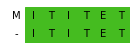

In [85]:
fig,ax = plt.subplots(figsize=(2.0,0.8))
graphics.plot_alignment_similarity_based(ax,glb_alignments[0],
matrix=p_matrix,symbols_per_line=len(glb_alignments[0]))
fig.tight_layout()

In [88]:
# Alignment score
# seq Identity
print('score',glb_alignments[0].score)
print('seq identity',align.get_sequence_identity(glb_alignments[0]))

score 18
seq identity 1.0


In [89]:
seq1 == seq2

False

In [95]:
# get DB name
entrez.get_database_name('Nucleotide')

'nuccore'

In [96]:
# get DB for proten
entrez.get_database_name('Protein')

'protein'

In [93]:
# Download and parse seq of Covid and Mers
import biotite.database.entrez as entrez
covid_file_path = entrez.fetch('NC_045512.2','myresult_dir',suffix='fa',db_name='nuccore',ret_type='fasta')
mers_file_path = entrez.fetch('NC_019843.3','myresult_dir',suffix='fa',db_name='nuccore',ret_type='fasta')

In [97]:
covid_file_path

'myresult_dir/NC_045512.2.fa'

In [98]:
# Read FASTA file with Biotite
import biotite.sequence.io.fasta as fasta


In [99]:
# methods/atributes
dir(fasta)

['FastaFile',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'convert',
 'file',
 'get_alignment',
 'get_sequence',
 'get_sequences',
 'set_alignment',
 'set_sequence',
 'set_sequences']

In [100]:
covid_file = fasta.FastaFile()
covid_file.read(covid_file_path)

In [101]:
print(covid_file)

ACCTCTGAAGACATGCTTAACCCTAATTATGAAG
ATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGG
ACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAG
TTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTT
ACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGG
TTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCAT
GCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTA
CGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTT
TCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTA
ACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTG
CTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGA
TGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAAAAGAACA
ATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTC
AATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACCTTTTGCTATGGGTATTATTGCTATGTC
TGCTTTTGCAATGATGTTTGTCAAACATAAGCATGCATTTCT

In [102]:
mers_file = fasta.FastaFile()
mers_file.read(mers_file_path)

In [103]:
print(covid_file.items())

ItemsView(<biotite.sequence.io.fasta.FastaFile object at 0x7fcca30fbbe0>)


In [113]:
for header,sequence in covid_file.items():
    print(header)
    print(sequence)
    covid_seq = seq.NucleotideSequence(sequence)

TACAAGTATTTTAGTGGAGCAATGGATACAACTAGCTACAGAGAAGCTGCTTGTTGTCATCTCGCAAAGGCTCTCAATGACTTCAGTAACTCAGGTTCTGATGTTCTTTACCAACCACCACAAACCTCTATCACCTCAGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCCATCTGGTAAAGTTGAGGGTTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCTTTGGCTTGATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAACCCTAATTATGAAGATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGGACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAGTTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCATGCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTACGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTAACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTGCTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTA

In [114]:
for header,sequence in mers_file.items():
    mers_seq = seq.NucleotideSequence(sequence)

In [116]:
# Comparison: len, freq, alignment, GC count


In [119]:
# Len of sequences (which is the longest)
print('Len Covid',len(covid_seq))
print('Len Mers',len(mers_seq))

Len Covid 29903
Len Mers 30119


In [122]:
# N Freq content
print('Freq of N of Covid',(
covid_seq.get_symbol_frequency()))
print('Freq of N of Mers',(mers_seq.get_symbol_frequency()))

Freq of N of Covid {'A': 8954, 'C': 5492, 'G': 5863, 'T': 9594}
Freq of N of Mers {'A': 7900, 'C': 6116, 'G': 6304, 'T': 9799}


In [124]:
str(covid_seq).count('G')

5863

In [129]:
# GC content (how stable a dna is)
def gc_content(seq):
    result = float(str(seq).count('G') + str(seq).count('C'))/len(seq) * 100
    return result 


In [130]:
gc_content(covid_seq)

37.97277865097147

In [131]:
gc_content(mers_seq)

41.23642883229855

In [133]:
## Plot
freq_covid = covid_seq.get_symbol_frequency()
freq_mers = mers_seq.get_symbol_frequency()

<BarContainer object of 4 artists>

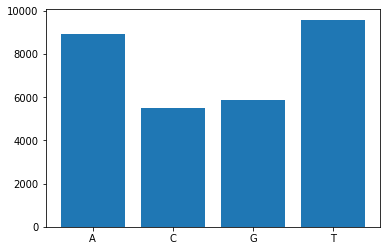

In [134]:
plt.bar(freq_covid.keys(),freq_covid.values())

<BarContainer object of 4 artists>

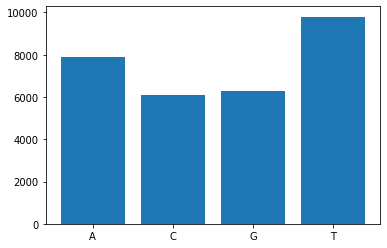

In [135]:
plt.bar(freq_mers.keys(),freq_mers.values())

In [139]:
# SEQ ALIGNMENT between covid and mers
mini_covid_seq = covid_seq[0:200]
mini_mers_seq = mers_seq[0:200]

In [141]:
print(n_matrix)

    A   C   G   T   R   Y   W   S   M   K   H   B   V   D   N
A   5  -4  -4  -4   1  -4   1  -4   1  -4  -1  -4  -1  -1  -2
C  -4   5  -4  -4  -4   1  -4   1   1  -4  -1  -1  -1  -4  -2
G  -4  -4   5  -4   1  -4  -4   1  -4   1  -4  -1  -1  -1  -2
T  -4  -4  -4   5  -4   1   1  -4  -4   1  -1  -1  -4  -1  -2
R   1  -4   1  -4  -1  -4  -2  -2  -2  -2  -3  -3  -1  -1  -1
Y  -4   1  -4   1  -4  -1  -2  -2  -2  -2  -1  -1  -3  -3  -1
W   1  -4  -4   1  -2  -2  -1  -4  -2  -2  -1  -3  -3  -1  -1
S  -4   1   1  -4  -2  -2  -4  -1  -2  -2  -3  -1  -1  -3  -1
M   1   1  -4  -4  -2  -2  -2  -2  -1  -4  -1  -3  -1  -3  -1
K  -4  -4   1   1  -2  -2  -2  -2  -4  -1  -3  -1  -3  -1  -1
H  -1  -1  -4  -1  -3  -1  -1  -3  -1  -3  -1  -2  -2  -2  -1
B  -4  -1  -1  -1  -3  -1  -3  -1  -3  -1  -2  -1  -2  -2  -1
V  -1  -1  -1  -4  -1  -3  -3  -1  -1  -3  -2  -2  -1  -2  -1
D  -1  -4  -1  -1  -1  -3  -1  -3  -3  -1  -2  -2  -2  -1  -1
N  -2  -2  -2  -2  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1


In [144]:
custom_alignments = align.align_optimal(mini_covid_seq, mini_mers_seq,n_matrix,gap_penalty=(-10,-1),terminal_penalty=False)

In [146]:
# all alignment (where it aligns and where not)
for i in custom_alignments:
    print(i)

CGTTGCACTTGTCTGGTGGGATTGTGGCAT

------GCATGCT----TAGTGCA-----------CTCACGCA----GTATAATTAATAACTAATTACTG
TAATTTGCCTGCTCATCTAG-GCAGTGGACATATGCTCA-ACACTGGGTATAATT-CTAATTGAATACTA

TCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGT
TTTTTC---------------------------------------------
-ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTT----TCGATCTCTTGTAGATCTGTTCT
GATTTAA-GTGAATAGCTT----GG-------CTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGAT

CTAAACGAACTT---TAAAATC-----TGTGTGGCTGT-------CACTCGGCT----------------
TTTAACGAACTTAAATAAAAGCCCTGTTGTTTAGC-GTATCGTTGCACTTGTCTGGTGGGATTGTGGCAT

------GCATGCT----TAGTGCA-----------CTCACGCA----GTATAATTAATAACTAATTACTG
TAATTTGCCTGCTCATCTAG-GCAGTGGACATATGCTCA-ACACTGGGTATAATT-CTAATTGAATACTA

TCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGT
TTTTTC---------------------------------------------
-ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTT----TCGATCTCTTGTAGATCTGTTCT
GATTTAAG-TGAATAGCTT----GG-------CTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGAT

CTAAACGAACTT---TAAAATC-----TGTGTGGC-------TGT

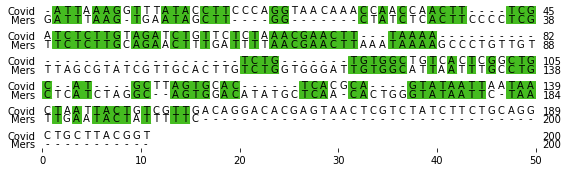

In [148]:
fig = plt.figure(figsize=(8.0,2.5))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(ax,custom_alignments[0],
matrix=n_matrix,labels=['Covid','Mers'],
show_numbers=True, show_line_position=True
)
fig.tight_layout()

plt.show()

In [149]:
# How identical are covid and mers (SCORE)
custom_alignments[0].score

# big because it is a big sequence

205

In [150]:
# How identical are they
align.get_sequence_identity(custom_alignments[0])

# small because it is a very small part of it

0.49767441860465117